Retail Sales Dataset: A Dive into Sales Patterns and Customer Profiles.
Data Source: Kaggle.com

PROBLEM STATEMENT:
To get following insights from the dataset:

1. How does customer age and gender influence their purchasing behavior?
3. Are there discernible patterns in sales across different time periods?
4. Which product categories hold the highest appeal among customers?
5. What are the relationships between age, spending, and product preferences?
6. How do customers adapt their shopping habits during seasonal trends?
7. Are there distinct purchasing behaviors based on the number of items bought per transaction?
8. What insights can be gleaned from the distribution of product prices within each category?

In [91]:
# import pandas & matplotlib

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Load CSV into DataFrame
df = pd.read_csv('retail_sales_dataset.csv')

In [71]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [72]:
# Remove duplicates and save
df = df.drop_duplicates()

In [73]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [74]:
# Check if there are any null values in the DataFrame
has_null = df.isnull().values.any()
print(f"Are there any null values in the DataFrame? {has_null}")

Are there any null values in the DataFrame? False


In [75]:
# Calculate Sum of Total Amount
sum_total_amount = df['Total Amount'].sum()

print(f"The sum of the Total Amount is: {sum_total_amount}")

The sum of the Total Amount is: 456000


In [76]:
# Calculate the average of the 'Age' of all customers
average_age = df['Age'].mean()

print(f"The average age of customers is: {average_age:.2f} years")

The average age of customers is: 41.39 years


In [77]:
# Filter the dataFrame to include only male customers
male_customers = df[df['Gender'] == 'Male']

# Calculate the average age of male customers
average_age_male = male_customers['Age'].mean()

print(f"The average age of male customers is: {average_age_male:.2f} years")

The average age of male customers is: 41.43 years


In [78]:
# Filter the DataFrame to include only male customers
female_customers = df[df['Gender'] == 'Female']

# Calculate the average age of male customers
average_age_female = female_customers['Age'].mean()

print(f"The average age of male customers is: {average_age_female:.2f} years")

The average age of male customers is: 41.36 years


In [79]:
# Calculate total amount bought per gender. Group by Gender and sum the Total Amount
total_amount_by_gender = df.groupby('Gender')['Total Amount'].sum()

print("Total Amount by Gender:")
print(total_amount_by_gender)

Total Amount by Gender:
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


This shows that females bought more than males

In [80]:
# Get all unique ages
unique_ages = df['Age'].unique()

# Sort the ages for better readability
unique_ages_sorted = sorted(unique_ages)

print("Unique ages in the DataFrame:")
print(unique_ages_sorted)

Unique ages in the DataFrame:
[18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


In [81]:
#1. How does customer age and gender influence their purchasing behavior?

In [82]:
# Group the customers by Gender and Age annd then aggregate by summing the Total Amount.
# Age Group: 16 - 35,35 - 55, 55 - 100
# Define the bins and labels
age_bins = [16, 35, 55, 100]
age_labels = ['16-35', '35-55', '55-100']

# Create a new column 'Age Group' that categorizes ages into bins
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Group by 'Gender' and 'Age Group', then sum 'Total Amount'
grouped = df.groupby(['Gender', 'Age Group'])['Total Amount'].sum()


print(grouped)

Gender  Age Group
Female  16-35        87770
        35-55        99790
        55-100       45280
Male    16-35        83970
        35-55        94280
        55-100       44910
Name: Total Amount, dtype: int64


C:\Users\kemif\AppData\Local\Temp\ipykernel_34868\1516948935.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Gender', 'Age Group'])['Total Amount'].sum()


KEY OBSERVATIONS:
1. The Female customers spent more than their male counterparts in all the age categories, especially in the younger and middle-aged groups. This is in alignment with the common consumer behavior where females tend to shop more frequently than the men.
2. Age group 36-55 turned out to be the highest spenders in both sexes. This group may likely represents individuals who are at the peak of their earning potential and are spending on family, home, and quality products.
3. There is a huge decline in the spending of people within the Age group of 56-100, particularly for females. This could be due to retirement, reduced income, or a shift in priorities towards health and essentials.

In [83]:
#2. Are there discernible patterns in sales across different time periods?

In [84]:
print(df.dtypes)
#This is to check the data types particularly for the date column i.e to be sure its in date/time format

Transaction ID         int64
Date                  object
Customer ID           object
Gender                object
Age                    int64
Product Category      object
Quantity               int64
Price per Unit         int64
Total Amount           int64
Age Group           category
dtype: object


In [85]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [86]:
# To analyze the sales patterns across different time periods, I will extract month, quarter, and day
# from the 'Date' column and then plot bar charts for each.

# Create the 'Day of Week', month and quater columns:
df['Day of Week'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

In [87]:
# Group Total Amount by Day of the week, Month and Quarter

# Group by Day of the Week
weekday_sales = df.groupby('Day of Week')['Total Amount'].sum()

# Group by Month
monthly_sales = df.groupby('Month')['Total Amount'].sum()

# Group by Quarter
quarterly_sales = df.groupby('Quarter')['Total Amount'].sum()


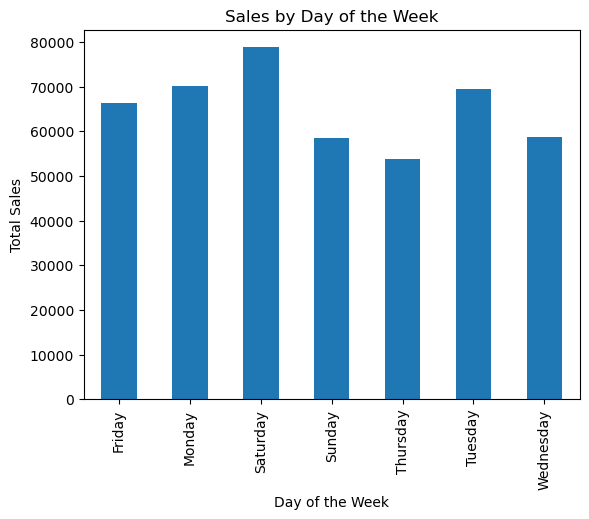

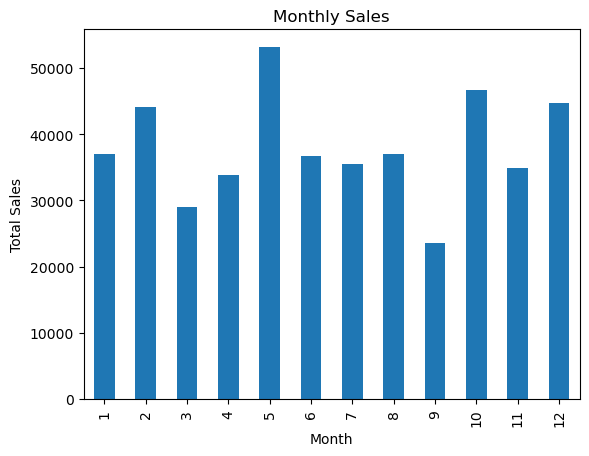

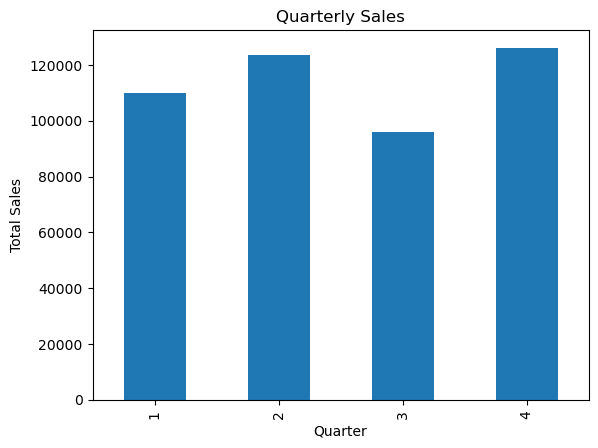

In [88]:
# Plot a bar chart of Weekday Sales
weekday_sales.plot(kind='bar', title='Sales by Day of the Week', xlabel='Day of the Week', ylabel='Total Sales')
plt.show()

#  Plot a bar chart of Monthly Sales
monthly_sales.plot(kind='bar', title='Monthly Sales', xlabel='Month', ylabel='Total Sales')
plt.show()

#  Plot a bar chart of Quarterly Sales
quarterly_sales.plot(kind='bar', title='Quarterly Sales', xlabel='Quarter', ylabel='Total Sales')
plt.show()

WEEKLY SALES ~ KEY OBSERVATIONS:
1. Saturday has the highest sales, reaching nearly 80,000 which suggests that more shopping happens on the weekend
   perhaps due to more free time.
2. Friday and Monday show strong sales, reaching nearly to 70,000. This could indicate that customers are likely to shop
   before the weekend (on Friday) and at the beginning of the workweek (on Monday).
3. Thursday has the lowest sales, suggesting that customers might be less active towards the end of the workweek.

MONTHLY SALES ~ KEY OBSERVATIONS
1. The chart shows that May has the highest sales, exceeding 50,000. This could be due to specific seasonal events, holidays,
   or promotions occurring during this month.
2. February, October and December also show strong sales parterns which may be influenced by events suct as Valentine's Day,
   early holiday shopping, preparations for Halloween, end-of-year bonuses, and the festive season.
3. The lowest sales months are march (month 3) and september (month 9)

QUARTERLY SALES ~ KEY OBSERVATIONS
1. Highest sales figure of about 120,000 can be seen in the 4th quater (October, November, December) which is typical
   because of shopping events like Black Friday, Cyber Monday, and the holiday season,when consumers generally spend more.
2. The third quarter (July, August, September) has the lowest sales, under 100,000. This could be due to a typical slowdown
   during summer where people are on vacation, spending less on retail, or waiting for back-to-school sales in late August
   and early September.

In [51]:
#3. Which product categories hold the highest appeal among customers?
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group,Day of Week,Month,Quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,16-35,Friday,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,16-35,Monday,2,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,35-55,Friday,1,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-55,Sunday,5,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,16-35,Saturday,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,55-100,Tuesday,5,2
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,35-55,Friday,11,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,16-35,Sunday,10,4
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35-55,Tuesday,12,4


In [52]:
# Group by Product Category and sum the Total Amount
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()

# Rename columns for clarity
category_sales.columns = ['Category', 'Total Sales']

# Sort the data by Total Sales for better readability
category_sales = category_sales.sort_values(by='Total Sales', ascending=False)

print(category_sales)

      Category  Total Sales
2  Electronics       156905
1     Clothing       155580
0       Beauty       143515


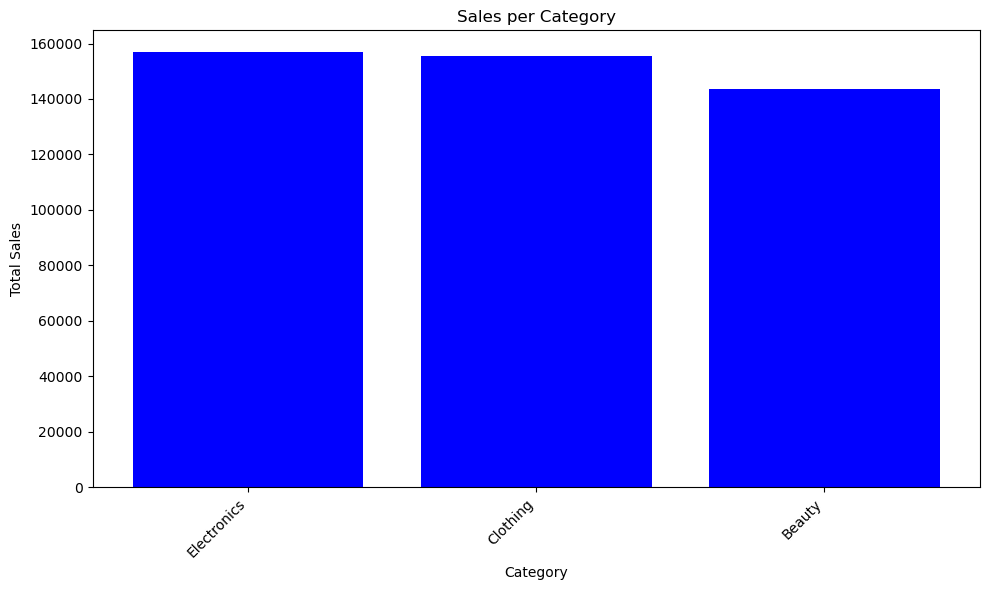

In [53]:
# Plotting the sales per category
plt.figure(figsize=(10, 6))
plt.bar(category_sales['Category'], category_sales['Total Sales'], color='blue')
plt.title('Sales per Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


KEY OBSERVATIONS:
1. Electronics is the category with the highest sales with close to 160,000 total amount sold which shows that it holds the highest appeal
   among customers.
2. Clothing category also shows strong sales, slightly below Electronics but still around 150,000.
3. The Beauty category also performed well, with sales close to those of Clothing. 

In [54]:
#4. What are the relationships between age, spending, and product preferences?
# Using a box plot and age group column

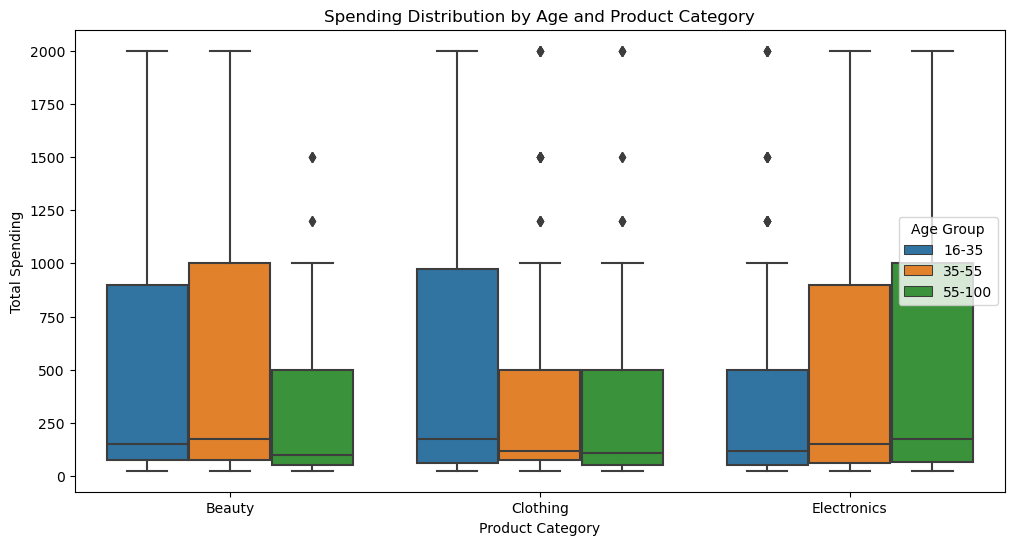

In [89]:
import seaborn as sns
# Create the a box plot using the Product Category,Age group and Total Amount

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Category', y='Total Amount', hue='Age Group')
plt.title('Spending Distribution by Age and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()


KEY OBSERVATIONS:

1. The middle-aged group (35-55) tends to have the highest median spending across most categories, particularly in electronics, which might reflect
   greater disposable income and the need for durable goods. With some outliers in the electronics category.
2. Age group (16-35) show strong spending in beauty and clothing, which may be as a result of trends and lifestyle, but a moderate investment in
   electronics. With some outliers in the clothing category.
3. For the older Consumers (55-100), their spending decreased across all categories, but with some significant investments
   in electronics which suggesting selective purchasing behavior. With some outliers in beauty and clothing categories

Each age group has distinct spending behaviors, indicating the need for age-targeted marketing strategies.

In [57]:
# 5. How do customers adapt their shopping habits during seasonal trends?
# To show how seasonal trends affects customers shopping, group the total sales by product category and Quater. 
# Then plot a quaterly bar chart for each category

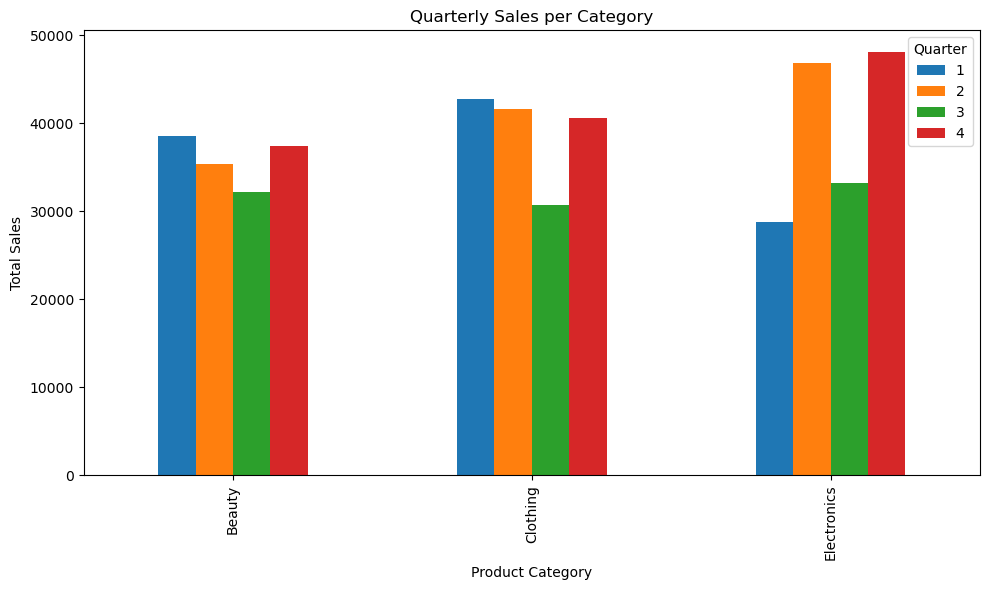

In [90]:
# Group by 'Product Category' and 'Quarter' and sum the 'Total Amount'
quarterly_sales = df.groupby(['Product Category', 'Quarter'])['Total Amount'].sum().unstack()

# Plot the bar chart
quarterly_sales.plot(kind='bar', figsize=(10, 6))

plt.title('Quarterly Sales per Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.legend(title='Quarter')
plt.tight_layout()
plt.show()

KEY OBSERVATIONS:
1. The sales trends show clear seasonal patterns, with Q4 (Red) being the strongest quarter across all categories perhaps due to holiday shopping.
2. Each category shows different patterns to changes in the season. While beauty maintains a very consistent sales pattern throughtout the year,
   elecronics shows the most dramatic increase in Q4.

Category Quarterly Breakdown:
1. Beauty Category:
   In Q1 (Blue),sales is strong, indicating a solid start to the year, this may have been influenced by New Year’s resolutions or early-year
   promotions.
   Sales drops slightly in Q2 (Orange), but remains relatively high, possibly due to consumers continued interest in beauty products as the weather
   warms up.
   There is decrease in sales in Q3, which could be due to consumers being more focussed on back-to-school needs rather than personal care.
   In Q4 (Red), sales rises again, perhaps due to holiday shopping, gift-giving, and promotional events like Black Friday.
   
2. Clothing Category:
   In Q1 (Blue) this category shows strong sales. This may be attributed to post-holiday sales, New Year wardrobe refreshes, or early-year fashion
   trends.
   Sales remained high in Q2 (Orange), likely driven by preparations for summer.
   There’s a noticeable drop in Q3 (Green), which might be due to the end of summer and a focus on back-to-school purchases that don’t significantly
   drive clothing sales.
   Sales picks up again in Q4 (Red), driven by holiday shopping, winter fashion needs, and gift-giving.
   
3. Electronics Category:
   Sales in Q1 (Blue) are the lowest for this category, which could be due to consumers just recovering from holiday shopping.
   In Q2 (Orange), sales increased, this may be driven by spring sales, tax refunds, or preparation for summer activities that require new electronics.
   Sales dipped slightly in Q3(Green), which could be a reflection of a seasonal slowdown in electronics purchases.
   Q4(Red) recorded the highest sales, and this aligns with the holiday shopping season when consumers purchase gifts, take advantage of discounts, and
   upgrade their gadgets.

In [59]:
# 6. Are there distinct purchasing behaviors based on the number of items bought per transaction?

In [60]:
df_copy= df.copy()
# I decided to make a backup copy of my dataframe at this point

In [61]:
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group,Day of Week,Month,Quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,16-35,Friday,11,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,16-35,Monday,2,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,35-55,Friday,1,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-55,Sunday,5,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,16-35,Saturday,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50,55-100,Tuesday,5,2
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90,35-55,Friday,11,4
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100,16-35,Sunday,10,4
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150,35-55,Tuesday,12,4


C:\Users\kemif\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


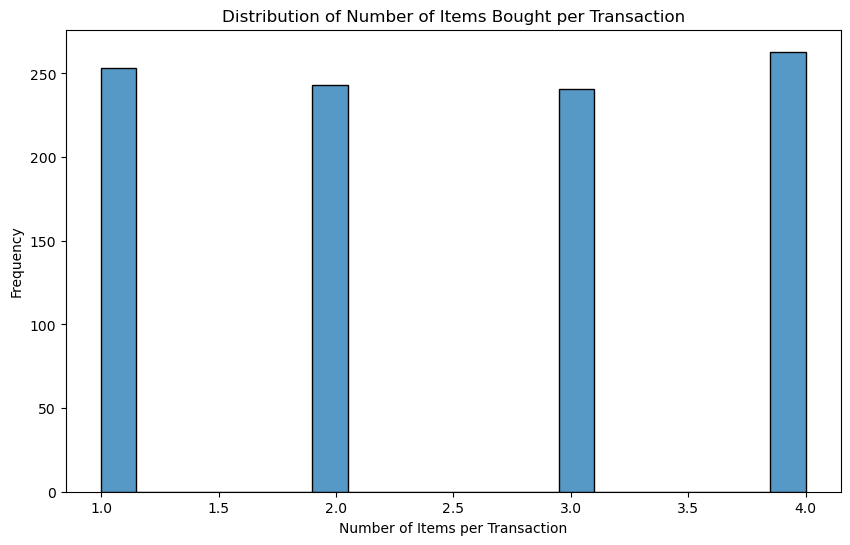

In [62]:
# To show the distinct purchasing behaviors based on the number of items bought per transaction, 
# I used a bar chart showing the frequency per quantity of items bought per transaction i.e we want 
# to see how often (frequency) customers bougth 1 or 2 or 3 or 4 items per transaction

plt.figure(figsize=(10, 6))
sns.histplot(df['Quantity'], bins=20, kde=False)
plt.title('Distribution of Number of Items Bought per Transaction')
plt.xlabel('Number of Items per Transaction')
plt.ylabel('Frequency')
plt.show()

1. The bar chart shows that there is an almost equal frequency of transactions with 1, 2, 3, and 4 items. This suggests that customers are equally
   likely to buy 1, 2, 3, or 4 items in a single transaction.
2. The chart also indicates that no transactions involved more than 4 items. This could imply either a natural limit in customer purchasing behavior or
   a restriction in the dataset (e.g., the data only includes transactions with up to 4 items).
3. Since customers are equally likely to buy between 1 and 4 items, it suggests the inventory should be balanced to cater to a wide range of purchase
   sizes. Stocking strategies should accommodate small to medium-sized purchases.
4. The consistent number of transactions with 2 or more items suggests that cross-selling or bundling strategies might be effective. Promoting
   complementary products could encourage customers to add more items to their cart.
5. Also, given the even distribution, promotions that encourage customers to buy more items (e.g., “Buy 2, get 1 free”) may be well-received, as the
   data shows customers are already inclined to buying multiple items.

In [63]:
#7. What insights can be gleaned from the distribution of product prices within each category?

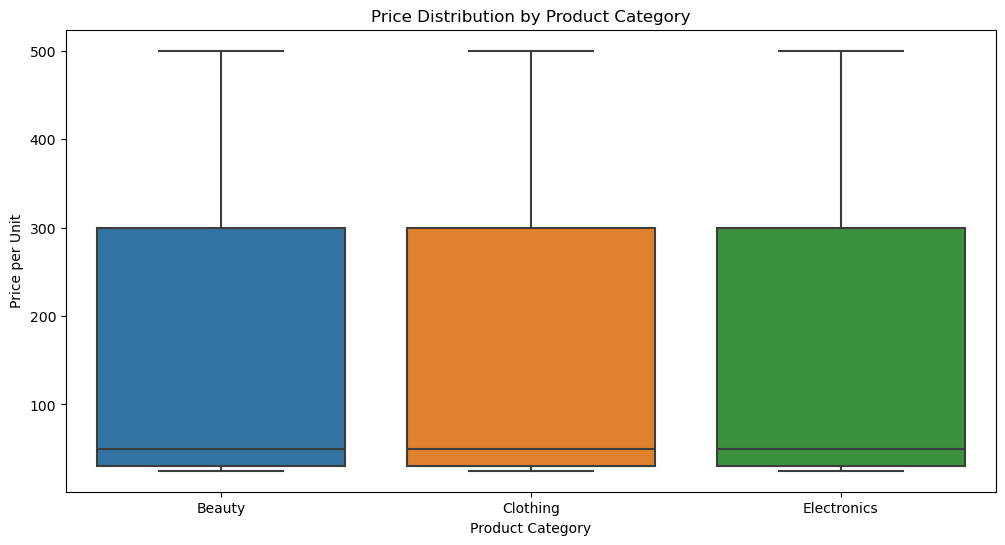

In [64]:
# using box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Product Category', y='Price per Unit')
plt.title('Price Distribution by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Price per Unit')
plt.show()

KEY OBSERVATIONS
1. All 3 categories have a wide price range, with the maximum price in each category reaching up to 500 units.
2. The maximum prices (upper whiskers) for all categories are the same, which suggests that they all have similar price caps, possibly due to pricing
   strategies or product offerings.

Insights Per Category
1. Beauty:
 - The median price for Beauty products is relatively low, closer to the bottom of the box. This suggests that most products in this category are on
   the lower end of the price spectrum.
 - The height of the box indicates a wide interquartile range(IQR), suggesting significant variability in beauty product prices. This reflects a diverse
   product range, from budget-friendly to premium beauty items.
2. Clothing:
 - The median price is also low, similar to the Beauty category, indicating that most clothing items are priced towards the lower end.
 - The Clothing category has a similar IQR to Beauty, indicating variability in prices within this category as well, which might be due to a range of
   product types (e.g., basic wear vs. designer clothing).
3. Electronics:
 - The Electronics category also shows a low median price, but slightly higher than Clothing and Beauty. This suggests that while the majority of
   electronics products are low-cost, there are more mid-range options available compared to the other categories.
 - This category also has an IQR similar to the others, indicating that while there are high-end products, a large portion of products is in the lower
   price range.

END
